In [1]:
import pandas as pd
import seaborn as sns

import os
os.environ.setdefault("DARTS_CONFIGURE_MATPLOTLIB", "0")
from darts import TimeSeries    
import matplotlib.pyplot as plt
    
from darts.metrics import mape, mae, rmse

In [2]:
df = pd.read_csv("./data/amf-performance.csv")
df['datetime'] = pd.to_datetime(df['time'], unit='s') # resample function needs a datetime column
df = df.drop(['time', 'lat75', 'lat80', 'lat90', 'lat95', 'lat98', 'lat99', 'lat100'], axis=1)

frequency = '1h'

# additional features
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour

# Remove from ram_limit 'M' and convert the column to integer
df['ram_limit'] = df['ram_limit'].str.replace('M', '').astype(int)

# Convert ram usage from bytes to MB
df['ram_usage'] = df['ram_usage'] / (1024 ** 2)

df_max = df.resample(frequency, on='datetime').max()
df_max

,ram_limit,cpu_limit,ram_usage,cpu_usage,n,mean,lat50,day,hour
datetime,,,,,,,,,
2021-11-10 14:00:00,2048.0,2.0,1078.375000,1.276808,500.0,60398090.0,60414274.0,10.0,14.0
2021-11-10 15:00:00,2048.0,2.0,1487.113281,0.996645,460.0,93936583.0,94259814.0,10.0,15.0
2021-11-10 16:00:00,2048.0,2.0,1425.011719,0.983066,480.0,95931083.0,96020918.0,10.0,16.0
2021-11-10 17:00:00,2048.0,2.0,1526.386719,0.983279,480.0,97132575.0,97360300.0,10.0,17.0
2021-11-10 18:00:00,2048.0,2.0,964.027344,0.999460,440.0,97207925.0,97417298.0,10.0,18.0
...,...,...,...,...,...,...,...,...,...
2021-11-27 04:00:00,1280.0,2.0,1672.492188,1.323356,550.0,98065398.0,98048590.0,27.0,4.0
2021-11-27 05:00:00,4096.0,2.0,975.718750,1.257932,550.0,98199627.0,98221357.0,27.0,5.0
2021-11-27 06:00:00,3840.0,1.5,1751.023438,1.324840,550.0,96423698.0,96467143.0,27.0,6.0


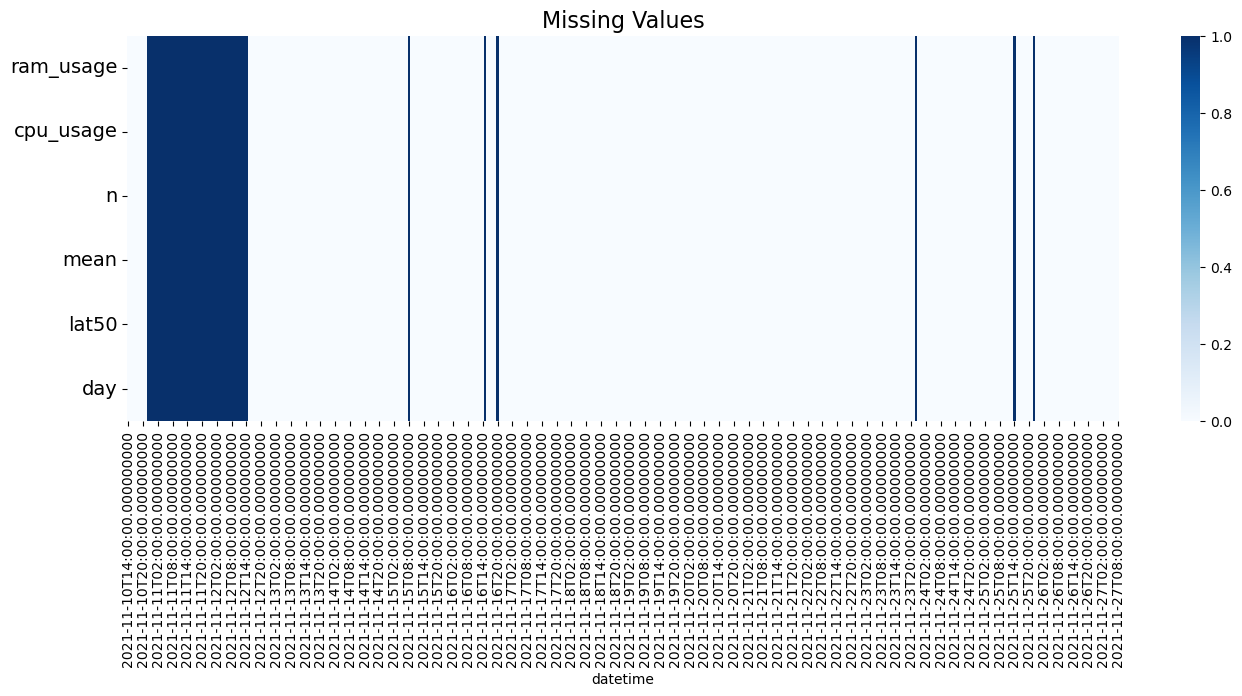

In [3]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df_max.iloc[:,2:-1].T.isna(), cmap='Blues') #drop useless columns
ax.set_title('Missing Values', fontsize=16)

# Rotate y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Set the rotation angle as needed


for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
plt.show()

Remove the big portion of missing values

In [4]:
# Set the filter condition based on the desired date and time
df_max_reset = df_max.reset_index()
df_max_reset['datetime'] = pd.to_datetime(df_max_reset['datetime'])
filter_condition = df_max_reset['datetime'] > '2021-11-12 14:00:00'

# Apply the filter to get the subset of the DataFrame
filtered_df = df_max_reset[filter_condition].set_index('datetime')

Plot filtered datafarame

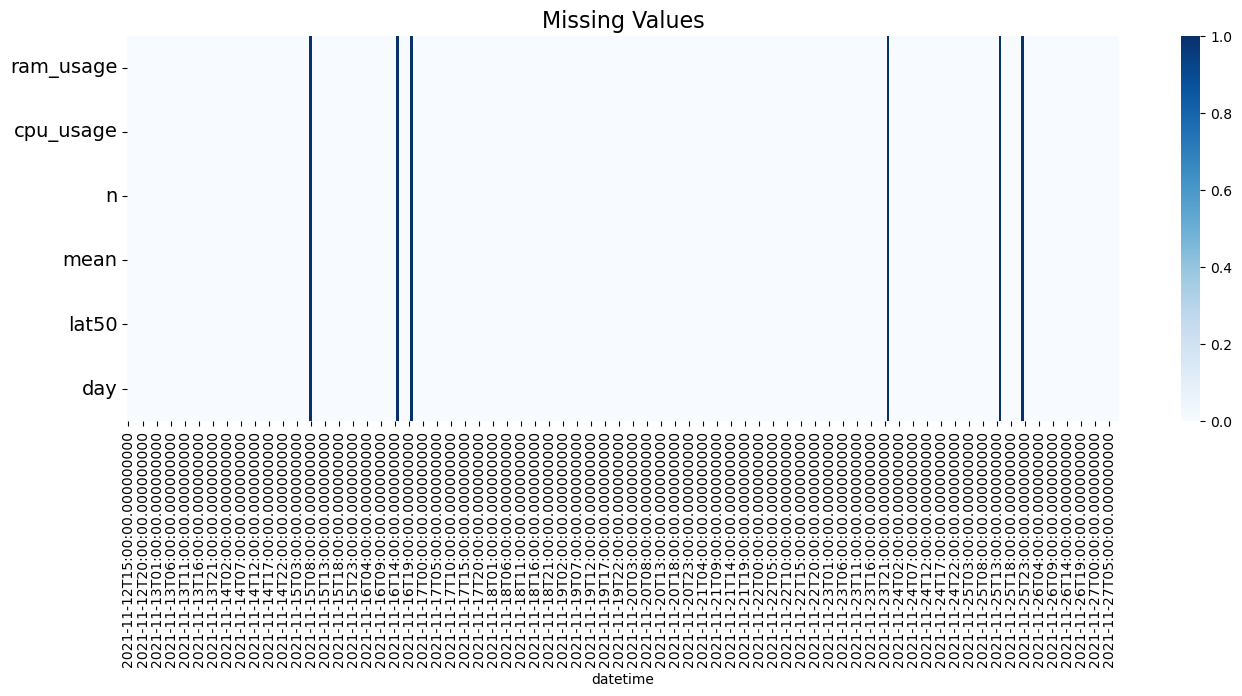

In [5]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(filtered_df.iloc[:,2:-1].T.isna(), cmap='Blues') #drop useless columns
ax.set_title('Missing Values', fontsize=16)

# Rotate y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Set the rotation angle as needed


for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
plt.show()

Interpolate in order to fill the null values in the df

In [6]:
interpolated_df = filtered_df.interpolate()
interpolated_df.isna().sum()

ram_limit    0
cpu_limit    0
ram_usage    0
cpu_usage    0
n            0
mean         0
lat50        0
day          0
hour         0
dtype: int64

In [7]:
interpolated_df

,ram_limit,cpu_limit,ram_usage,cpu_usage,n,mean,lat50,day,hour
datetime,,,,,,,,,
2021-11-12 15:00:00,4096.0,4.0,1147.921875,1.358302,520.0,67451009.0,67428077.0,12.0,15.0
2021-11-12 16:00:00,3584.0,4.0,1783.832031,1.385498,520.0,68222008.0,68162522.0,12.0,16.0
2021-11-12 17:00:00,3072.0,4.0,1762.128906,1.382358,550.0,77777013.0,77747786.0,12.0,17.0
2021-11-12 18:00:00,2304.0,4.0,1768.171875,1.358083,530.0,70557306.0,70546856.0,12.0,18.0
2021-11-12 19:00:00,1280.0,4.0,1684.777344,1.307712,520.0,68996878.0,68965997.0,12.0,19.0
...,...,...,...,...,...,...,...,...,...
2021-11-27 04:00:00,1280.0,2.0,1672.492188,1.323356,550.0,98065398.0,98048590.0,27.0,4.0
2021-11-27 05:00:00,4096.0,2.0,975.718750,1.257932,550.0,98199627.0,98221357.0,27.0,5.0
2021-11-27 06:00:00,3840.0,1.5,1751.023438,1.324840,550.0,96423698.0,96467143.0,27.0,6.0


# Baseline memory forecasting

In [8]:
# define train and test size
train_size = int(0.7 * len(interpolated_df))
test_size = len(interpolated_df) - train_size

split_point = interpolated_df.iloc[train_size].name
split_point

Timestamp('2021-11-22 22:00:00')

In [9]:
series = TimeSeries.from_dataframe(interpolated_df.reset_index(), 'datetime', ['ram_usage'])

# train test split
train, test = series.split_after(split_point)

In [10]:
mean_value = test.values().mean()
pred_series = TimeSeries.from_times_and_values(
    times=test.time_index,
    values=[mean_value] * len(test)  # Repeat the mean value for all time steps
)

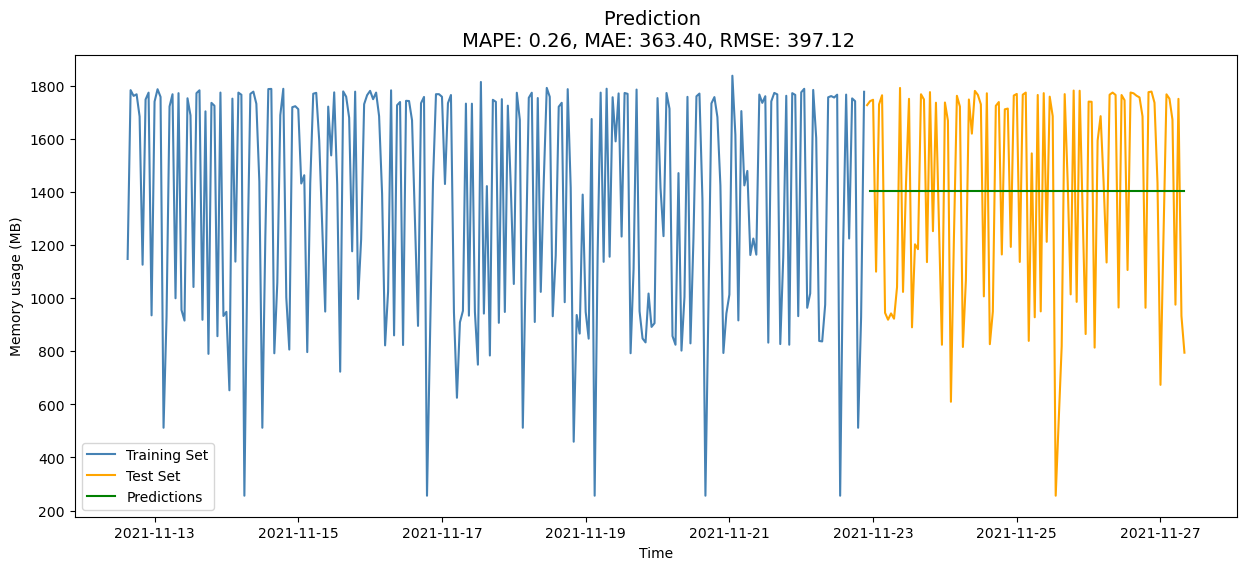

In [11]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

mape_score = mape(pred_series, test)/100
mae_score = mae(pred_series, test)
rmse_score = rmse(pred_series, test)

# Plot the data
ax.plot(interpolated_df.index[:train_size], series[:train_size].values(), label="Training Set", color="steelblue")
ax.plot(interpolated_df.index[train_size:], series[train_size:].values(), label="Test Set", color="orange")
ax.plot(interpolated_df.index[train_size + 1:], pred_series.values(), label="Predictions", color='green')
plt.title(f'Prediction \n MAPE: {mape_score:.2f}, MAE: {mae_score:.2f}, RMSE: {rmse_score:.2f}', fontsize=14)

plt.xlabel('Time')
plt.ylabel('Memory usage (MB)') 
plt.legend()

plt.show()